In [1]:
from google.colab import files

uploaded = files.upload()

Saving test_vocabulary.txt to test_vocabulary.txt


In [2]:

!wget -c https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.uk.300.vec.gz
!gunzip -k cc.uk.300.vec.gz

--2025-06-06 06:49:58--  https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.uk.300.vec.gz
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 3.163.189.51, 3.163.189.14, 3.163.189.96, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|3.163.189.51|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1257595219 (1.2G) [binary/octet-stream]
Saving to: ‚Äòcc.uk.300.vec.gz‚Äô

cc.uk.300.vec.gz    100%[===================>]   1.17G  62.0MB/s    in 21s     

2025-06-06 06:50:20 (56.8 MB/s) - ‚Äòcc.uk.300.vec.gz‚Äô saved [1257595219/1257595219]



In [3]:
import numpy as np

word_vectors = {}

with open("cc.uk.300.vec", "r", encoding="utf-8") as f:
    next(f)  # –ü—Ä–æ–ø—É—Å–∫–∞—î–º–æ –ø–µ—Ä—à–∏–π —Ä—è–¥–æ–∫ –∑ —Ä–æ–∑–º—ñ—Ä–Ω—ñ—Å—Ç—é
    for line in f:
        parts = line.rstrip().split(' ')
        word = parts[0]
        vec = np.array(parts[1:], dtype=float)
        word_vectors[word] = vec

print(f"–ó–∞–≤–∞–Ω—Ç–∞–∂–µ–Ω–æ {len(word_vectors)} –≤–µ–∫—Ç–æ—Ä—ñ–≤")

–ó–∞–≤–∞–Ω—Ç–∞–∂–µ–Ω–æ 2000000 –≤–µ–∫—Ç–æ—Ä—ñ–≤


In [4]:

quad_file = "test_vocabulary.txt"

raw_quads = []
with open(quad_file, "r", encoding="utf-8") as f:
    for line in f:
        if ':' in line and 'adjective-adverb' in line:
            continue  # –ø—Ä–æ–ø—É—Å–∫–∞—î–º–æ –∑–∞–≥–æ–ª–æ–≤–æ–∫
        parts = line.strip().split('\t')
        if len(parts) == 4:
            raw_quads.append(tuple(parts))

print(f"–ó–Ω–∞–π–¥–µ–Ω–æ —á–µ—Ç–≤—ñ—Ä–æ–∫ —É —Ñ–∞–π–ª—ñ: {len(raw_quads)}")

–ó–Ω–∞–π–¥–µ–Ω–æ —á–µ—Ç–≤—ñ—Ä–æ–∫ —É —Ñ–∞–π–ª—ñ: 23970


In [5]:
valid_quads = []

for adj1, adv1, adj2, adv2 in raw_quads:
    if adj1 in word_vectors and adv1 in word_vectors and adj2 in word_vectors and adv2 in word_vectors:
        valid_quads.append((adj1, adv1, adj2, adv2))

print(f"–ö—ñ–ª—å–∫—ñ—Å—Ç—å –≤–∞–ª—ñ–¥–Ω–∏—Ö —á–µ—Ç–≤—ñ—Ä–æ–∫: {len(valid_quads)}")

–ö—ñ–ª—å–∫—ñ—Å—Ç—å –≤–∞–ª—ñ–¥–Ω–∏—Ö —á–µ—Ç–≤—ñ—Ä–æ–∫: 17000


In [6]:

def cosine_similarity(vec1, vec2):
    return np.dot(vec1, vec2) / (np.linalg.norm(vec1) * np.linalg.norm(vec2))

# –ê–Ω–∞–ª–æ–≥—ñ—è —á–µ—Ä–µ–∑ cosine: adj1 : adv1 = adj2 : ?
def find_best_adv_cosine(adj1, adv1, adj2, word_vectors):
    target_vec = word_vectors[adv1] - word_vectors[adj1] + word_vectors[adj2]
    best_score = -1
    best_word = None
    for word, vec in word_vectors.items():
        if word in {adj1, adv1, adj2}:
            continue
        sim = cosine_similarity(target_vec, vec)
        if sim > best_score:
            best_score = sim
            best_word = word
    return best_word, best_score

In [8]:
import random
from tqdm import tqdm


sample_quads = random.sample(valid_quads, 1000)


limited_words = list(word_vectors.keys())[:100000]
limited_vectors = {w: word_vectors[w] for w in limited_words}


def find_best_adv_cosine_fast(adj1, adv1, adj2):
    target_vec = word_vectors[adv1] - word_vectors[adj1] + word_vectors[adj2]
    best_score = -1
    best_word = None
    for word in limited_words:
        if word in {adj1, adv1, adj2}:
            continue
        sim = cosine_similarity(target_vec, word_vectors[word])
        if sim > best_score:
            best_score = sim
            best_word = word
    return best_word

correct = 0

print("–û–±—á–∏—Å–ª–µ–Ω–Ω—è —Ç–æ—á–Ω–æ—Å—Ç—ñ –Ω–∞ 1000 —á–µ—Ç–≤—ñ—Ä–∫–∞—Ö...")
for quad in tqdm(sample_quads):
    adj1, adv1, adj2, adv2 = quad
    predicted = find_best_adv_cosine_fast(adj1, adv1, adj2)
    if predicted == adv2:
        correct += 1

accuracy = correct / len(sample_quads)
print(f"\n‚úÖ –¢–æ—á–Ω—ñ—Å—Ç—å –Ω–∞ —Ç–µ—Å—Ç–æ–≤—ñ–π –≤–∏–±—ñ—Ä—Ü—ñ: {accuracy:.4f} ({correct} –∑ {len(sample_quads)})")

–û–±—á–∏—Å–ª–µ–Ω–Ω—è —Ç–æ—á–Ω–æ—Å—Ç—ñ –Ω–∞ 1000 —á–µ—Ç–≤—ñ—Ä–∫–∞—Ö...


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1000/1000 [14:51<00:00,  1.12it/s]


‚úÖ –¢–æ—á–Ω—ñ—Å—Ç—å –Ω–∞ —Ç–µ—Å—Ç–æ–≤—ñ–π –≤–∏–±—ñ—Ä—Ü—ñ: 0.3230 (323 –∑ 1000)


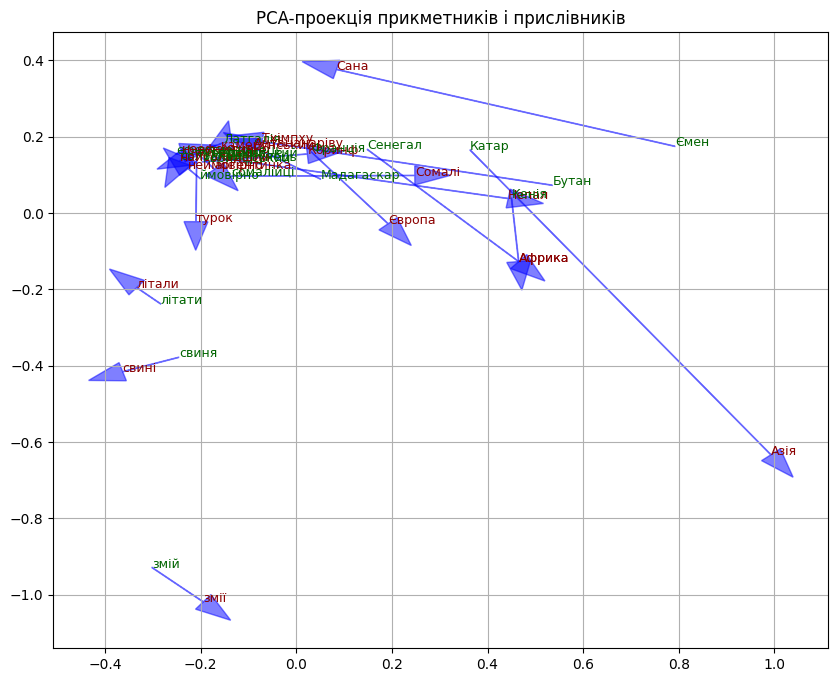

In [11]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# –í–∏–ø–∞–¥–∫–æ–≤—ñ 20 –ø–∞—Ä
sample_pairs = random.sample(valid_quads, 20)

# –ó–±–∏—Ä–∞—î–º–æ —Å–ª–æ–≤–∞ —ñ –≤–µ–∫—Ç–æ—Ä–∏
words = []
vectors = []
for adj, adv, _, _ in sample_pairs:
    if adj in word_vectors and adv in word_vectors:
        words.extend([adj, adv])
        vectors.append(word_vectors[adj])
        vectors.append(word_vectors[adv])

# PCA: 300 ‚Üí 2 –≤–∏–º—ñ—Ä–∏
pca = PCA(n_components=2)
projected = pca.fit_transform(vectors)

# –í—ñ–∑—É–∞–ª—ñ–∑–∞—Ü—ñ—è
plt.figure(figsize=(10, 8))
for i in range(0, len(projected), 2):
    adj = words[i]
    adv = words[i+1]
    x1, y1 = projected[i]
    x2, y2 = projected[i+1]

    # –°—Ç—Ä—ñ–ª–∫–∞: –ø—Ä–∏–∫–º–µ—Ç–Ω–∏–∫ ‚Üí –ø—Ä–∏—Å–ª—ñ–≤–Ω–∏–∫
    plt.arrow(x1, y1, x2 - x1, y2 - y1, head_width=0.05, color='blue', alpha=0.5)

    # –¢–µ–∫—Å—Ç–∏
    plt.text(x1, y1, adj, fontsize=9, color='darkgreen')
    plt.text(x2, y2, adv, fontsize=9, color='darkred')

plt.title("PCA-–ø—Ä–æ–µ–∫—Ü—ñ—è –ø—Ä–∏–∫–º–µ—Ç–Ω–∏–∫—ñ–≤ —ñ –ø—Ä–∏—Å–ª—ñ–≤–Ω–∏–∫—ñ–≤")
plt.grid(True)
plt.show()

In [13]:
import json

sample_size = 1000  # –∞–±–æ –±—ñ–ª—å—à–µ, —è–∫ —Ö–æ—á–µ—à
sample_quads = random.sample(valid_quads, sample_size)

results = []
correct = 0

print(f"üîç –¢–µ—Å—Ç—É–≤–∞–Ω–Ω—è –Ω–∞ {sample_size} —á–µ—Ç–≤—ñ—Ä–∫–∞—Ö...")

for adj1, adv1, adj2, adv2 in tqdm(sample_quads):
    predicted = find_best_adv_cosine_fast(adj1, adv1, adj2)
    is_correct = predicted == adv2
    if is_correct:
        correct += 1
    results.append({
        "adj1": adj1,
        "adv1": adv1,
        "adj2": adj2,
        "expected_adv2": adv2,
        "predicted_adv2": predicted,
        "correct": is_correct
    })

accuracy = correct / sample_size
print(f"\n‚úÖ –¢–æ—á–Ω—ñ—Å—Ç—å: {accuracy:.4f} ({correct} –∑ {sample_size})")

# –ó–±–µ—Ä–µ–∂–µ–Ω–Ω—è –≤ JSON
with open("analogy_results.json", "w", encoding="utf-8") as f:
    json.dump(results, f, ensure_ascii=False, indent=2)

print("üìÅ –†–µ–∑—É–ª—å—Ç–∞—Ç–∏ –∑–±–µ—Ä–µ–∂–µ–Ω–æ –≤ —Ñ–∞–π–ª: analogy_results.json")

üîç –¢–µ—Å—Ç—É–≤–∞–Ω–Ω—è –Ω–∞ 1000 —á–µ—Ç–≤—ñ—Ä–∫–∞—Ö...


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1000/1000 [15:16<00:00,  1.09it/s]


‚úÖ –¢–æ—á–Ω—ñ—Å—Ç—å: 0.3450 (345 –∑ 1000)
üìÅ –†–µ–∑—É–ª—å—Ç–∞—Ç–∏ –∑–±–µ—Ä–µ–∂–µ–Ω–æ –≤ —Ñ–∞–π–ª: analogy_results.json
